___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# 15.2 Linear Regression With Python

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.


In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [3]:
import warnings
warnings.filterwarnings("ignore")

* Now we will learn about doing linear regression with Python.

* We will start off by working with a housing data set trying to create a model to predict housing prices based off of existing features.

* As this is our first Machine Learning algorithm we will work with some artificially created datasets. Afterwards we will progress to using real, messier datasets from **Kaggle**.

## Housing Dataset

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib as plt 
import seaborn as sns

In [6]:
# To see the visualisations within the notebook
%matplotlib inline
sns.set_style('darkgrid')

### Check out the Data

In [7]:
USA_Housing = pd.read_csv("USA_Housing.csv")

In [8]:
USA_Housing.head()
# Dataframe has some columns, every row represents different house with address in the end, there is price for each house
# and other columns represent different statistics for city or the area in which house is located such as Avg. Income of people
# in that area, Avg. Age of house in that area, Avg. # of rooms and bedrooms and population of that area.


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
USA_Housing.info()
# Gives us info about total number of columns and entries, as well as info about type of objects in dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [10]:
# Other thing that you might want to do is calling describe method on dataframe
USA_Housing.describe()
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, 
# excluding NaN values.
# Works only for numerical values, notice how address column is not present as that was string type.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
# To reference column names 
USA_Housing.columns # A list of column names

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Creating Some plots to check data

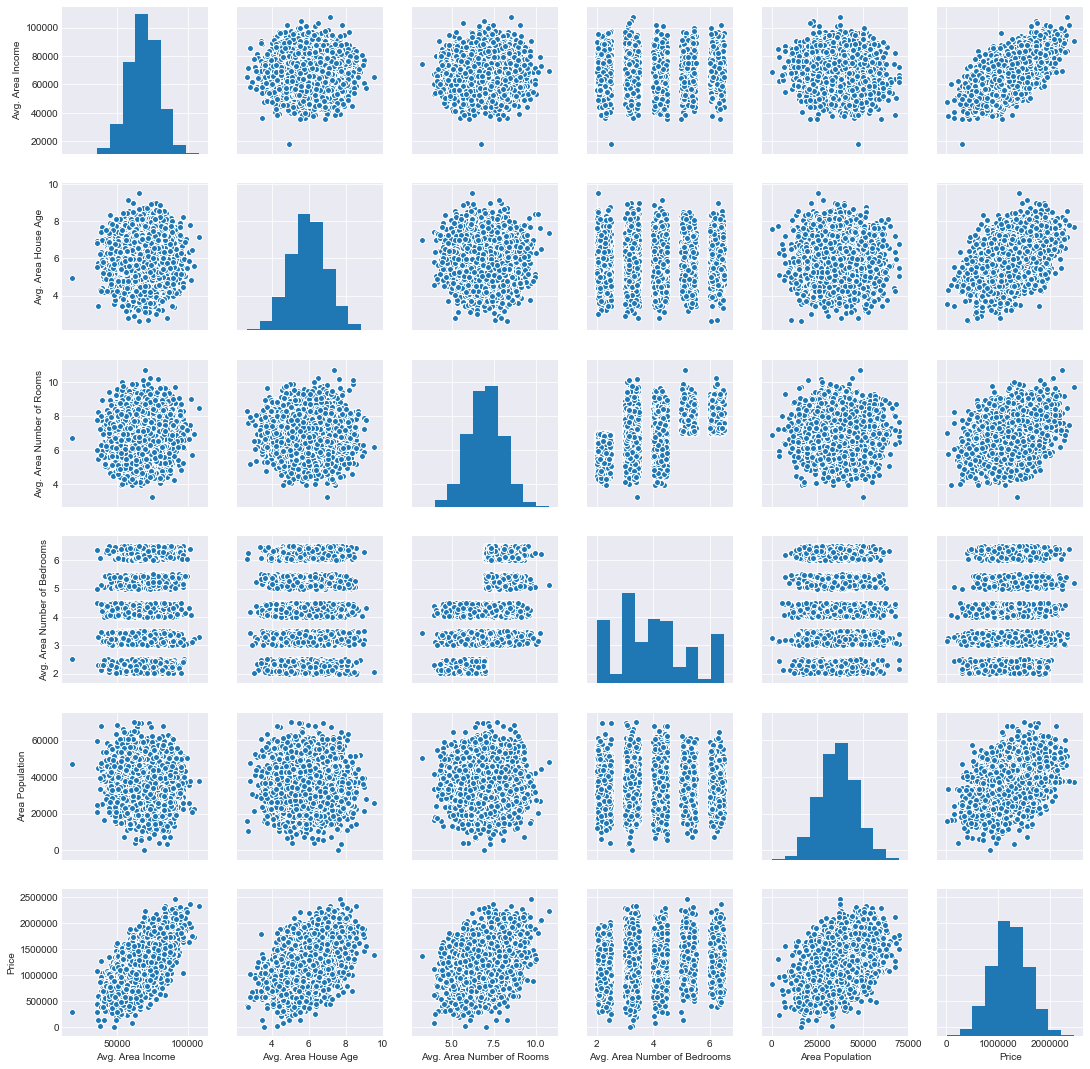

In [12]:
# A plot that we can do if data isn't extremely large is sns's pairplot, passing in the entire dataframe.
sns.pairplot(USA_Housing)

* From pairplot above we can see that everything is almost normally distributed, except for average number of bedrooms as they can be only discrete 2,3,4,5 or 6 there is some noise but still we can differentiate that there are 4 to 5 discrete entries in bedroom features which lines up with how we know bedrooms are discrete.

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


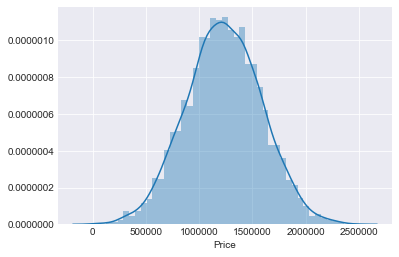

In [13]:
# Let's check distribution of one of the column, Price column
sns.distplot(USA_Housing['Price'])
# We are doing it for price as it is going to be our target column or what we will be predicting.
# Here we predict price of the house. From plot we can infer that average price falls somewhere
# between 1M to 1.5 Million mark and is normally distributed.

In [14]:
USA_Housing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


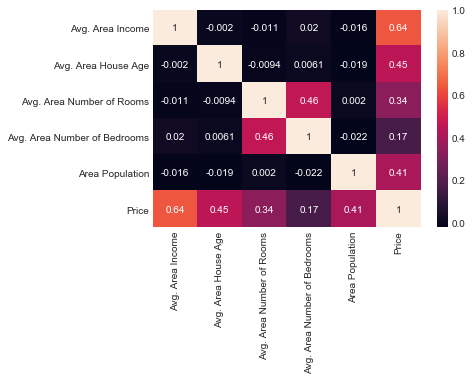

In [15]:
# Plotting a heatmap of correlation between each of the columns
sns.heatmap(USA_Housing.corr(),annot=True)
# Diagonal of full correlation means every column is perfectly related with itself,
# areas which are black means that there is little to no corrleation and so on, shown in legend on right.


## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [16]:
USA_Housing.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


In [17]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USA_Housing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

* What we do here is tuple unpacking grabbing our training and testing set, we will have X_train and y_train and then we will have X_test and y_test, in train_test_split function we pass our X data and y data and we can also pass in test_size where we say between 0 to 1 the percentage of dataset that we want to be allocated to test_size, in our case 0.4 means 40%

* random_state here we can just pass in a number whether we want it or not, essentialy it ensures s specific set of random splits on our data, as per train_test_split it occurs randomly. Changing random_state can lead to different results, we would be right but still it won't be exactly same matching results for different random_state

In [19]:
# We pass in our x and y data and then specifying the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


## Creating and Training the Model

In [20]:
# Now that we have training and testing data we need to create and train the model, done as per following
from sklearn.linear_model import LinearRegression

In [21]:
# Instantiate an instance of LinearRegression model
lm = LinearRegression() # Creating a linear regression object|

In [22]:
lm.fit(X_train,y_train) # Takes in a X and y and fits the linear model, here we want to fit the model to training data 
# NOTE : We do not need to set lm.fit... equal to some other variable object to store it's result, as this is taking effect
# onto the object lm iteself and we do not need to write lm = lm.fit... 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
print(lm.intercept_)

-2640159.7968525263


In [24]:
lm.coef_ # Returns coefficient for each feature

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
# Let's create a dataframe based off of these coefficients, as each of these coefficients relates to columns
X_train.columns

In [25]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

In [26]:
coeff_df # More info on coefficients and mathematics in reading assignment
# Here it is not making as much sense as this is a dummy data,Boston housing prices dataset is worth looking into and you can
# do the same for that dataset. It is available in scikit-learn from a 1970 study. Below we will see how to access it.

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because Jose Portilla made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):

- If the above coefficients were of real data then we would have seen negative coefficients in areas such as age of the house increases then its price goes down and much more.

In [27]:
from sklearn.datasets import load_boston

In [28]:
boston = load_boston()

In [29]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['DESCR'])

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [30]:
predictions = lm.predict(X_test)
# Asking our model to predict for features from test dataset which it hasn't seen before specifically during training period.

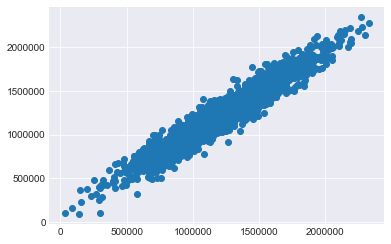

In [31]:
# Just printing the predictions won't make that much of difference so here we compare predictions against real y_test
plt.pyplot.scatter(y_test,predictions)
# This basically means that line of best fit is pretty close to y values and error would be less.

**Residual Histogram**

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


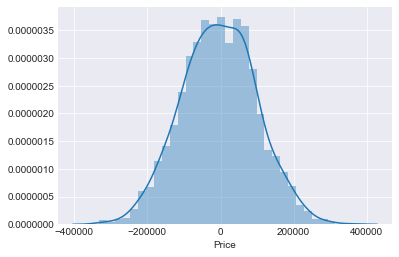

In [32]:
# Residuals are difference between actual values y_test and predicted values
sns.distplot((y_test-predictions))
# This is a histogram of residuals, and residuals look to be normally distributed, if we have normally distributed residuals
# then it means our model was a correct choice for the data. If not normally distributed then we might have to look back and
# reflect upon the choice whether linear regression model was the correct choice for the dataset. More on choosing correct
# model later on in the course.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world, as it squares the larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [33]:
from sklearn import  metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914948
MSE: 10460958907.209064
RMSE: 102278.8292229094
